In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## PREPARE Data

In [3]:
dataset = pd.read_csv('path_to_dataset/heart.csv')

Parameter thal contains useless values ( 0 ) that must be dropped 


In [4]:
dataset.drop(dataset.loc[dataset['thal']==0].index, inplace=True)   # drop rows where thal == 0

In [5]:
dataset['thal'] = dataset['thal'] - 1  # alter thal values from {1, 2, 3} to {0, 1, 2}

In [6]:
len(dataset)

1018

In [7]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,2,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,2,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,2,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,2,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,1,0


In [8]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000
mean,54.447937,0.696464,0.943026,131.636542,246.253438,0.146365,0.529470,149.187623,0.334971,1.074951,1.385069,0.759332,1.339882,0.513752
std,9.101835,0.460011,1.029886,17.574327,51.676406,0.353646,0.528086,23.006116,0.472212,1.177640,0.618506,1.032432,0.591982,0.500057
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,1.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.750000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,2.000000,1.000000


In [9]:
X = dataset.drop('target', axis = 1)
Y = dataset['target']

In [10]:
len(X)

1018

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## TRAINING Neural Network

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras import utils
from tensorflow.keras.callbacks import ReduceLROnPlateau,ModelCheckpoint

In [50]:
dr = 0.2

model = Sequential()
model.add(Input(13))
model.add(Dense(100, activation = "relu"))
model.add(Dropout(dr))
model.add(Dense(100, activation = "relu"))
model.add(Dropout(dr))
model.add(Dense(100, activation = "relu"))
model.add(Dropout(dr))
model.add(Dense(100, activation = "relu"))
model.add(Dropout(dr))
model.add(Dense(100, activation = "relu"))
model.add(Dropout(dr))
model.add(Dense(1, activation = "sigmoid"))

In [51]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 100)               1400      
                                                                 
 dropout_25 (Dropout)        (None, 100)               0         
                                                                 
 dense_31 (Dense)            (None, 100)               10100     
                                                                 
 dropout_26 (Dropout)        (None, 100)               0         
                                                                 
 dense_32 (Dense)            (None, 100)               10100     
                                                                 
 dropout_27 (Dropout)        (None, 100)               0         
                                                                 
 dense_33 (Dense)            (None, 100)              

In [52]:
checkpoint = ModelCheckpoint(filepath = 'path_to_save_model/model.h5', monitor = 'val_accuracy' ,save_best_only = True, verbose = 1)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=20, 
                                            verbose=2, 
                                            factor=0.8, 
                                            min_lr=0.00001)


model.compile(loss='BinaryCrossentropy', optimizer='Adam', metrics=['accuracy'])

In [53]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),batch_size=16, epochs=400, verbose = 0, callbacks = [checkpoint, learning_rate_reduction])


Epoch 1: val_accuracy improved from -inf to 0.52451, saving model to /content/drive/MyDrive/learned_models/HeartDisease/model.h5

Epoch 2: val_accuracy did not improve from 0.52451

Epoch 3: val_accuracy improved from 0.52451 to 0.62745, saving model to /content/drive/MyDrive/learned_models/HeartDisease/model.h5

Epoch 4: val_accuracy did not improve from 0.62745

Epoch 5: val_accuracy improved from 0.62745 to 0.67157, saving model to /content/drive/MyDrive/learned_models/HeartDisease/model.h5

Epoch 6: val_accuracy did not improve from 0.67157

Epoch 7: val_accuracy did not improve from 0.67157

Epoch 8: val_accuracy improved from 0.67157 to 0.67647, saving model to /content/drive/MyDrive/learned_models/HeartDisease/model.h5

Epoch 9: val_accuracy did not improve from 0.67647

Epoch 10: val_accuracy did not improve from 0.67647

Epoch 11: val_accuracy did not improve from 0.67647

Epoch 12: val_accuracy did not improve from 0.67647

Epoch 13: val_accuracy did not improve from 0.67647

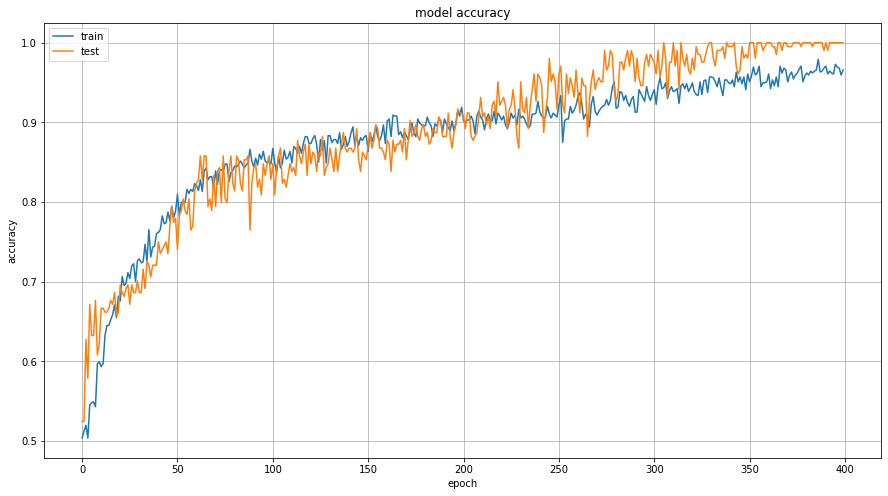

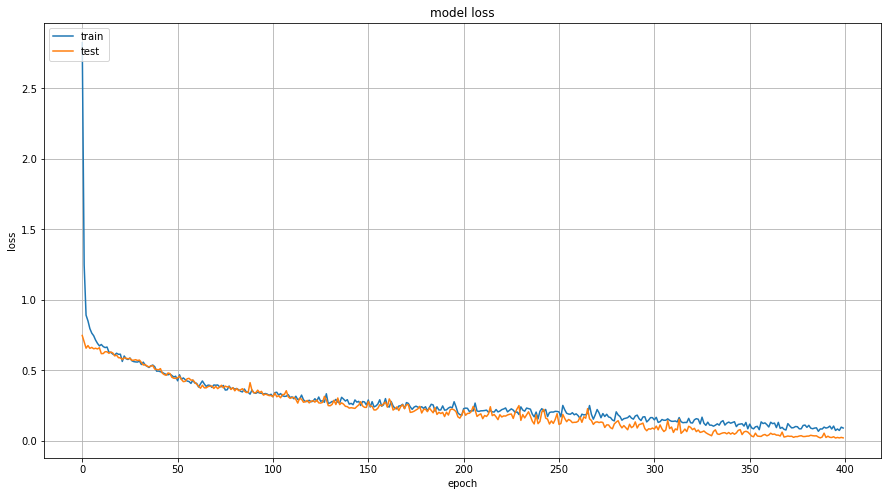

In [54]:
# summarize history for accuracy
plt.figure(figsize=(15, 8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()


# summarize history for loss
plt.figure(figsize=(15, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

## Evaluate

In [55]:
results = model.evaluate(X_test, Y_test, batch_size=1018)
print("test loss, test acc:", results)

1/1 [==============================] - 0s 41ms/step - loss: 0.0221 - accuracy: 1.0000
test loss, test acc: [0.02205861173570156, 1.0]


In [56]:
results = model.evaluate(X, Y, batch_size=1018)
print("overall loss, overall acc:", results)

1/1 [==============================] - 0s 41ms/step - loss: 0.0185 - accuracy: 1.0000
overall loss, overall acc: [0.018510539084672928, 1.0]
